### Step 1: Data Loading & Inspection

✔ **Loading the necessary depencies.**

✔ **Reading both Demographics.csv and BloodPressure.csv files into pandas DataFrame.**

✔ **Checking the shape, data type, and format of the data.**

✔ **Checking for missing values and any formatting issues.**

✔ **Checking for duplication or duplicated data.**

✔ **Identify any potential issues or inconsistencies.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
demographics_df = pd.read_csv('Demographics.csv')

blood_pressure_df = pd.read_csv('BloodPressure.csv')

# Display the first few rows of each dataset for structure understanding
demographics_df.head()

,PERSON_ID,SERVICE_DATE,AGE_MONTHS
0,123,1/5/2016,46
1,123,2/13/2016,47
2,456,6/8/2015,40
3,456,8/15/2015,42
4,456,5/21/2015,39


In [60]:
blood_pressure_df.head()

,PERSON_ID,TIME,SYSTOLIC_BLOOD_PRESSURE
0,123.0,1/5/2016 7:16,33
1,123.0,1/5/2016 7:17,75
2,123.0,1/5/2016 7:18,58
3,123.0,1/5/2016 7:19,93
4,123.0,1/5/2016 7:20,35


In [ ]:
##  Check the shape, data type, and format of the data

In [17]:
print('blood_pressure_df Shape:', blood_pressure_df.shape)

blood_pressure_df.info()

blood_pressure_df Shape: (1593, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PERSON_ID                1581 non-null   float64
 1   TIME                     1581 non-null   object 
 2   SYSTOLIC_BLOOD_PRESSURE  1580 non-null   object 
dtypes: float64(1), object(2)
memory usage: 37.5+ KB


In [21]:
print('demographics_df Shape:', demographics_df.shape)

demographics_df.info()

demographics_df Shape: (17, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PERSON_ID     17 non-null     int64 
 1   SERVICE_DATE  17 non-null     object
 2   AGE_MONTHS    17 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 540.0+ bytes


In [49]:
# Checking for missing values in the blood_pressure_df

blood_pressure_df.isnull().sum()

PERSON_ID                  12
TIME                       12
SYSTOLIC_BLOOD_PRESSURE    13
dtype: int64

In [50]:
# Checking for missing values in the demographics_df

demographics_df.isnull().sum()

PERSON_ID       0
SERVICE_DATE    0
AGE_MONTHS      0
dtype: int64

In [51]:
# Checking for duplication or duplicated data.

blood_pressure_df[blood_pressure_df.duplicated()].head()

,PERSON_ID,TIME,SYSTOLIC_BLOOD_PRESSURE
1487,987.0,2/17/2016 12:18,42
1488,987.0,2/17/2016 12:18,42
1489,987.0,2/17/2016 12:18,42
1492,987.0,2/17/2016 12:19,40
1582,NaN,NaN,NaN


In [52]:
demographics_df# Checking for duplication or duplicated data.

demographics_df[demographics_df.duplicated()]

,PERSON_ID,SERVICE_DATE,AGE_MONTHS


### Observations from Initial Data Load

In [53]:
# Demographics df: 
# 1. Contains PERSON_ID, SERVICE_DATE, and AGE_MONTHS.
# 2. SERVICE_DATE is in object data type and needs to be converted to datetime format.

# BloodPressure df:

# 1. Contains PERSON_ID, TIME, and SYSTOLIC_BLOOD_PRESSURE.
# 2. PERSON_ID is in float format (needs converted to integer).
# 3. TIME contains both date and time (we need to extract date for merging).
# 4. Contains both missing and duplicated values.

# 5. The BloodPressure df file contains completely empty rows with missing values in all columns, including PERSON_ID, 
# TIME, and SYSTOLIC_BLOOD_PRESSURE. These rows are likely corrupt or extra blank rows and should be removed.

### Step 2: Data Cleaning & Transformation

✔ **Remove rows from the blood_pressure_df where all values are NaN**

✔ **Convert PERSON_ID from BloodPressure df to integer.**

✔ **Convert SERVICE_DATE and TIME to datetime format.**

✔ **Extract only the date from TIME in BloodPressure df to enable proper merging**

✔ **Remove rows from the blood_pressure_df with Error values**

✔ **Deduped and take care of missing values from the BloodPressure df.**

In [3]:
# Remove rows from the blood_pressure_df where all values are NaN
blood_pressure_df = blood_pressure_df.dropna(how="any")

In [4]:
# Rechecking for missing values in the blood_pressure_df
blood_pressure_df.isnull().sum()

PERSON_ID                  0
TIME                       0
SYSTOLIC_BLOOD_PRESSURE    0
dtype: int64

In [5]:
# Convert PERSON_ID to integer for consistency
blood_pressure_df["PERSON_ID"] =  blood_pressure_df['PERSON_ID'].astype(int)

In [6]:
# Convert SERVICE_DATE and TIME to datetime format
demographics_df["SERVICE_DATE"] = pd.to_datetime(demographics_df['SERVICE_DATE'])
blood_pressure_df["TIME"] = pd.to_datetime(blood_pressure_df['TIME'])

In [7]:
# Extract the date part from TIME for merging
blood_pressure_df["SERVICEDATE"] = blood_pressure_df['TIME'].dt.date
blood_pressure_df["SERVICEDATE"] = pd.to_datetime(blood_pressure_df['SERVICEDATE'])

blood_pressure_df.head()

,PERSON_ID,TIME,SYSTOLIC_BLOOD_PRESSURE,SERVICEDATE
0,123,2016-01-05 07:16:00,33,2016-01-05
1,123,2016-01-05 07:17:00,75,2016-01-05
2,123,2016-01-05 07:18:00,58,2016-01-05
3,123,2016-01-05 07:19:00,93,2016-01-05
4,123,2016-01-05 07:20:00,35,2016-01-05


In [148]:
blood_pressure_df.PERSON_ID.duplicated().sum()

1572

In [149]:
blood_pressure_df.duplicated().sum()

4

In [150]:
# Identifying the duplicated four rows of data/record in the dataframe
blood_pressure_df.loc[blood_pressure_df.duplicated()]

,PERSON_ID,TIME,SYSTOLIC_BLOOD_PRESSURE,SERVICEDATE
1487,987,2016-02-17 12:18:00,42,2016-02-17
1488,987,2016-02-17 12:18:00,42,2016-02-17
1489,987,2016-02-17 12:18:00,42,2016-02-17
1492,987,2016-02-17 12:19:00,40,2016-02-17


In [8]:
blood_pressure_df.drop_duplicates(keep='first', inplace=True)

In [9]:
blood_pressure_df.duplicated().sum()

0

In [10]:
# Merge the two datasets on PERSON_ID and SERVICEDATE
merged_df = pd.merge(blood_pressure_df, demographics_df, left_on=['PERSON_ID', 'SERVICEDATE'], right_on=['PERSON_ID', 
                                                                                                         'SERVICE_DATE'], 
                     how="inner")

# Display cleaned and merged dataset
merged_df.head()

,PERSON_ID,TIME,SYSTOLIC_BLOOD_PRESSURE,SERVICEDATE,SERVICE_DATE,AGE_MONTHS
0,123,2016-01-05 07:16:00,33,2016-01-05,2016-01-05,46
1,123,2016-01-05 07:17:00,75,2016-01-05,2016-01-05,46
2,123,2016-01-05 07:18:00,58,2016-01-05,2016-01-05,46
3,123,2016-01-05 07:19:00,93,2016-01-05,2016-01-05,46
4,123,2016-01-05 07:20:00,35,2016-01-05,2016-01-05,46


In [11]:
# Rechecking for missing values after merging the dataframe
merged_df.shape

(1540, 6)

In [12]:
merged_df.isnull().sum()

PERSON_ID                  0
TIME                       0
SYSTOLIC_BLOOD_PRESSURE    0
SERVICEDATE                0
SERVICE_DATE               0
AGE_MONTHS                 0
dtype: int64

In [13]:
merged_df.dtypes

PERSON_ID                           int32
TIME                       datetime64[ns]
SYSTOLIC_BLOOD_PRESSURE            object
SERVICEDATE                datetime64[ns]
SERVICE_DATE               datetime64[ns]
AGE_MONTHS                          int64
dtype: object

In [14]:
merged_df['SYSTOLIC_BLOOD_PRESSURE'].unique()

array(['33', '75', '58', '93', '35', '52', '73', '46', '41', '43', '90',
       '34', '50', '85', '67', '65', '36', '48', '84', '98', '51', '86',
       '31', '72', '61', '68', '44', '66', '94', '100', '87', '80', '38',
       '97', '92', '49', '77', '78', '88', '55', '91', '64', '79', '53',
       '82', '47', '74', '45', '89', '71', '70', '30', '63', '95', '37',
       '60', '81', '39', '40', '42', '69', '57', '83', '32', '99', '56',
       '59', '96', '54', '76', '62', '0', 'ERROR'], dtype=object)

In [15]:
merged_df = merged_df.loc[merged_df['SYSTOLIC_BLOOD_PRESSURE']!='ERROR']

In [16]:
# Convert SYSTOLIC_BLOOD_PRESSURE to integer for consistency
merged_df["SYSTOLIC_BLOOD_PRESSURE"] =  merged_df['SYSTOLIC_BLOOD_PRESSURE'].astype(int)

In [17]:
merged_df['SYSTOLIC_BLOOD_PRESSURE'].unique()

array([ 33,  75,  58,  93,  35,  52,  73,  46,  41,  43,  90,  34,  50,
        85,  67,  65,  36,  48,  84,  98,  51,  86,  31,  72,  61,  68,
        44,  66,  94, 100,  87,  80,  38,  97,  92,  49,  77,  78,  88,
        55,  91,  64,  79,  53,  82,  47,  74,  45,  89,  71,  70,  30,
        63,  95,  37,  60,  81,  39,  40,  42,  69,  57,  83,  32,  99,
        56,  59,  96,  54,  76,  62,   0])

In [18]:
merged_df.to_excel("BCH_Low_Blood_Pressure_Analysis.xlsx", index=False)

### Step 3: Identifying Low Blood Pressure Cases

✔ **Create a strategy for finding periods of low blood pressure lasting 14+ minutes.**

✔ **If AGE_MONTHS < 44, low BP is ≤ 46 mmHg.**

✔ **If AGE_MONTHS ≥ 44, low BP is ≤ 55 mmHg.**

✔ **Identify periods where BP remains low for 14+ consecutive minutes.**

In [164]:
# Define low blood pressure thresholds based on age
merged_df["LOW_BP_THRESHOLD"] = merged_df["AGE_MONTHS"].apply(lambda x: 46 if x < 44 else 55)

In [165]:
# Identify rows where blood pressure is below the threshold
merged_df["IS_LOW_BP"] = merged_df["SYSTOLIC_BLOOD_PRESSURE"] <= merged_df["LOW_BP_THRESHOLD"]

In [166]:
# Sort by PERSON_ID and TIME for proper consecutive analysis
merged_df = merged_df.sort_values(by=["PERSON_ID", "TIME"])

In [167]:
# Group by PERSON_ID and SERVICE_DATE for consecutive analysis
low_bp_cases = []
for (person_id, service_date), group in merged_df.groupby(["PERSON_ID", "SERVICEDATE"]):
    group = group.sort_values(by="TIME")

    # Identify consecutive low blood pressure periods
    low_bp_periods = []
    start_time = None
    duration = 0

    for i in range(len(group)):
        if group.iloc[i]["IS_LOW_BP"]:
            if start_time is None:
                start_time = group.iloc[i]["TIME"]
                duration = 1  # Start with 1 minute
            else:
                duration += 1  # Increment duration
        else:
            if duration >= 14:
                low_bp_periods.append((person_id, service_date, duration))
            start_time = None
            duration = 0

    # Capture the final period if it meets the criteria
    if duration >= 14:
        low_bp_periods.append((person_id, service_date, duration))

    low_bp_cases.extend(low_bp_periods)

In [168]:
# Create final report DataFrame
final_report_df = pd.DataFrame(low_bp_cases, columns=["PERSON_ID", "SERVICE_DATE", "DURATION_MINUTES"])

final_report_df

,PERSON_ID,SERVICE_DATE,DURATION_MINUTES
0,123,2016-01-05,14
1,456,2015-05-21,20
2,567,2019-05-10,14
3,789,2017-07-07,16
4,987,2016-10-17,24


### Step 4: Visualizing Low Blood Pressure Cases Result

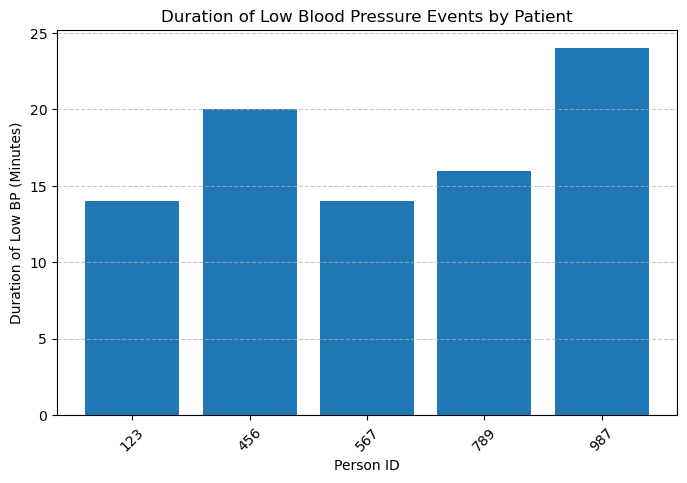

In [119]:
# Create a bar chart showing the duration of low blood pressure events by patient
plt.figure(figsize=(8, 5))
plt.bar(final_report_df["PERSON_ID"].astype(str), final_report_df["DURATION_MINUTES"])
plt.xlabel("Person ID")
plt.ylabel("Duration of Low BP (Minutes)")
plt.title("Duration of Low Blood Pressure Events by Patient")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display the visualization
plt.show()

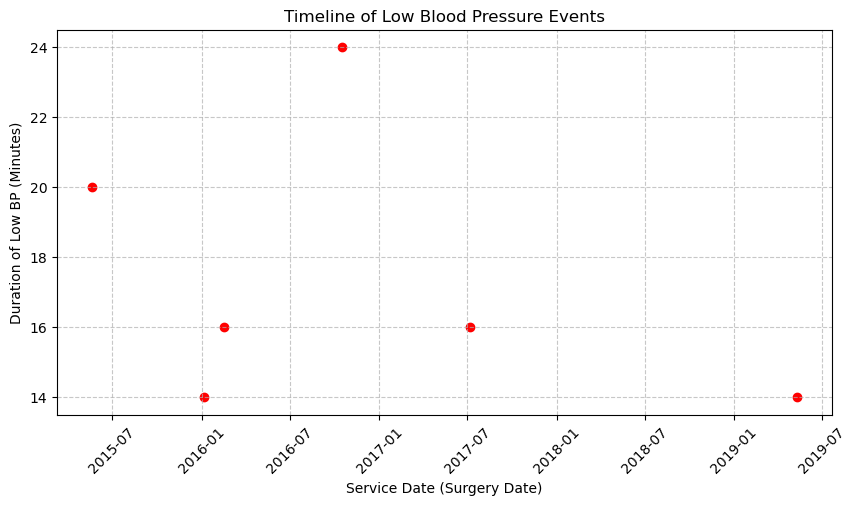

In [120]:
# Create a timeline plot showing low blood pressure events over the years
plt.figure(figsize=(10, 5))
plt.scatter(final_report_df["SERVICE_DATE"], final_report_df["DURATION_MINUTES"], color="red", marker="o")
plt.xlabel("Service Date (Surgery Date)")
plt.ylabel("Duration of Low BP (Minutes)")
plt.title("Timeline of Low Blood Pressure Events")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)

# Display the visualization
plt.show()